# 4장 전자상거래 데이터 분석

자료 출처: [Online Retail Dataset solution (EDA +RFM)](https://github.com/dekseniya/Online-Retail-Dataset)

여기에서 다룰 데이터세트는 각종 기프트 상품을 취급하는 영국 한 온라인 몰의 **전자상거래**(electronic commerce) 데이터이다. 이 회사의 고객들은 세계 전역의 도매상들이며, 온라인으로만 상품을 거래한다. 데이터세트는 2010년 12월 1일부터 2011년 12월 9일까지의 거래 내역이다. 

분석 방법은 회귀분석 등 통계 모형을 사용하지 않고, 기본 탐색 및 데이터 전처리, 기술적(descriptive) 분석, 고객 분류 기법 중의 하나인 RFM 분석 등이다.

## 4.1 데이터 로딩

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

[UCI Machine Learning Repository: Online Retail](https://archive.ics.uci.edu/ml/datasets/online+retail)에서 엑셀 데이터 파일 "Online Retail.xlsx"를 다운로드 받는다.  이 파일을 자신의 컴퓨터 적절한 폴더에 저장한 다음 아래의 명령문으로 데이터를 로딩시킨다.(데이터 파일이 들어있는 디렉토리를 적는 방법에 대해서는 2.2.1절의 ISLP "College.csv"를 불러들이는 방법을 참조할 것.)

다음과 같이 데이터를 인터넷에서 직접 로딩할 수도 있다.(아래 괄호안 URL로 들어가면 해당 데이터 파일이 다운로드됨)

```
df = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx') 
```

관측 개수가 50만개가 넘어서 데이터 로딩에 3~4분 정도 시간이 걸린다.

In [2]:
df = pd.read_excel("../Data/Online Retail.xlsx")
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**변수 설명**

- `InvoiceNo` : 인보이스 번호. 각 거래에 고유하게 부여된 6자리 정수. 이 코드가 문자 'C'로 시작하면 취소를 나타냄. 문자(nominal) 변수
- `StockCode` : 아이템 코드. 각 제품에 고유하게 부여된 5자리 정수. 문자(nominal) 변수
- `Description` : 아이템 이름. 문자(nominal) 변수
- `Quantity` : 거래 아이템 수량. 숫자(numeric) 변수
- `InvoiceDate` : 인보이스 날짜 및 시간. 즉, 각 거래가 실행된 날짜 및 시간
- `UnitPrice` : 단가. 단위당 아이템 가격(영국 파운드). 숫자(numeric) 변수
- `Customer ID` : 고객 ID. 각 고객에게 고유하게 부여된 5자리 정수. 숫자(numeric) 변수
- `Country` : 국가명. 각 고객이 거주하는 국가 이름.  문자(nominal) 변수

## 4.2 기본 탐색 및 데이터 전처리

### 데이터 검토
**데이터세트의 행 및 열의 개수**

In [3]:
print("데이터세트 행의 개수: ", df.shape[0])
print("데이터세트 열의 개수: ", df.shape[1])

데이터세트 행의 개수:  541909
데이터세트 열의 개수:  8


**각 변수의 데이터 유형 및 결측값 점검**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


`CustomerID` 변수에 관측값이 없는 경우가 상당수 있다. 또한 `Description` 변수에도 일부 결측값이 있다. 

**고유한 고객수**

하나의 `CustomerID`로 여러번 거래가 이루어질 수 있기 때문에 고유한 고객 숫자를 확인해보자. 거래 관측수는 54만개가 넘지만, 아래 결과에서 보듯이 고유한 고객수는 4,373명이다.

In [5]:
print("고유한 고객 ID 개수:", len(df['CustomerID'].unique()))

고유한 고객 ID 개수: 4373


**요약 통계량**

In [6]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### 취소된 거래 등 삭제

숫자형 변수(`Quantity` 및 `UnitPrice`)의 기술 통계(descriptive statistics)를 통해 이들 변수에 음수 값이 있음을 알 수 있다. 음수 값의 이유를 살펴보면, 거래가 취소된 경우일 수 있다. 취소된 거래는 `InvoiceNo`가 'C'로 시작한다. 이들 거래만 골라내보자. `astype(str)`은 데이터를 string으로 변환해준다.

In [7]:
cancelled = df[df['InvoiceNo'].astype(str).str.contains('C')]  
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


다음에서 보듯이 취소된 거래 중 `Quantity`가 플러스인 거래는 하나도 없는 것으로 확인된다.

In [8]:
cancelled[cancelled['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


그런데 다른 한편으로, `Quantity`가 음수이거나 0인 거래 중 일부는 취소된 거래에 속하지 않은 경우도 있다는 것을 다음과 같이 확인할 수 있다.

In [9]:
print("취소된 거래 건수:", len(cancelled))
print("`Quantity`가 음수이거나 0인 거래 건수:", df[df['Quantity'] <= 0 ]['Quantity'].count())

취소된 거래 건수: 9288
`Quantity`가 음수이거나 0인 거래 건수: 10624


다음에서 보듯이 `UnitPrice`(단가)가 0인 거래도 있다. 

In [10]:
df[df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


또한 2건의 거래는 `UnitPrice`가 마이너스로 기록돼 있다.

In [11]:
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


취소되지 않은 거래, 즉 `InvoiceNo`가 'C'로 시작하지 않은 거래 중 일부 역시 `Quantity`가 음수이거나 0이지만, 여기에 해당하는 모든 거래는 `UnitPrice`가 0인 것을 다음과 같이 확인할 수 있다.

In [12]:
d = df[~df['InvoiceNo'].astype(str).str.contains('C')]  

print("취소되지 않은 거래 중 Quantity가 0이거나 음수인 거래 건수:", 
      len(d[d['Quantity']<=0]))
print()
print("UnitPrice가 0이면서 Quantity가 0이거나 음수인 거래 건수:", 
      len(d[(d['Quantity']<=0) & (d['UnitPrice'] == 0)]))

취소되지 않은 거래 중 Quantity가 0이거나 음수인 거래 건수: 1336

UnitPrice가 0이면서 Quantity가 0이거나 음수인 거래 건수: 1336


데이터세트가 아래와 같기 때문에 `UnitPrice`가 양수이면서 `Quantity`도 양수인 거래(아래 그림에서 green에 해당하는 부분)를 제외한 모든 거래를 데이터세트에서 제거한다.

![데이터세트 구조](https://raw.githubusercontent.com/pilsunchoi/images/main/4-1.png)

In [13]:
df = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**인덱스 번호 다시 매기기**

In [14]:
df = df.reset_index()
df = df.drop('index', axis = 1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


**중복 관측 및 ID 없는 관측 삭제**

In [15]:
print("중복 기록된 거래 건수:", len(df[df.duplicated()]))

중복 기록된 거래 건수: 5226


In [16]:
df.drop_duplicates(inplace = True)

마지막으로 `CustomerID`가 기록되지 않은 관측들을 제거한다.

In [17]:
df = df.dropna(subset=['CustomerID'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
530099,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
530100,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
530101,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
530102,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


새로 만든 데이터세트에 대해 다시 한 번 각 변수의 데이터 유형 및 결측값을 점검한다.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 530103
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


### 자연어 처리

**모든 `Description`을 소문자로 변환**

In [19]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
df = df.assign(Description = df['Description'].str.lower())
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [21]:
print("고유한 Description 개수:", len(df['Description'].unique()))

고유한 Description 개수: 3877


**`Description`에서 마침표 제거**

위 결과를 보면, `Description`에 마침표가 들어있는 경우(가령 4번 관측)도 있다. 아래에서는 `replace()` 메서드를 사용해서 이를 없애보자. 

`replace(to_replace=r'[^\w\s]', value='', regex=True)`의 의미

- `r'[^\w\s]'`에 해당하는 것을 `value=`, 즉 `''`(따옴표 안에 아무것도 없기 때문에 삭제를 의미함)으로 대체한다는 것이다. 


- 그리고 `r'[^\w\s]'`에서 맨 앞의 `r`은 정규표현식(Regular Expression, 줄여서 regex)이며, `'[^\w\s]'`은 `\w`(모든 알파벳, 숫자, 언더스코어)와 `\s`(모든 공백)를 제외한(`^`) 모든 문자(string)를 의미한다. 


- 따라서 아래와 같이 `df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)`를 실행하면 `Description`에서 모든 알파벳, 숫자, 언더스코어, 공백을 제외한 모든 string, 즉 마침표 같은 것들이 삭제된다. 


- 정규표현식(regex)은 텍스트 파일을 처리할 때 텍스트 문자열을 검색하고 조작하는 데 매우 유용하다. 정규표현식 한 줄로 수십 줄의 프로그래밍 코드를 쉽게 대체할 수 있다.

In [22]:
a = df['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)
df = df.assign(Description = a)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
print("고유한 Description 개수:", len(df['Description'].unique()))

고유한 Description 개수: 3867


### 날짜 처리

인보이스 날짜 및 시간 변수인 `InvoiceDate`에서 연도, 월, 연월, 요일, 시간을 따로 분리하여 `year`, `month`, `year_month`, `day of week`, `hour`라는 이름으로 변수를 추가해보자.

In [24]:
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['WeekDay'] = df['InvoiceDate'].dt.day_name()
df['year_month'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['hour'] = df['InvoiceDate'].dt.hour
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,year_month,hour
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8


### 판매액 변수 만들기

거래 아이템 수량인 `Quantity` 변수에다  해당 아이템의 단가인 `UnitPrice` 변수를 곱하면 해당 거래에서 거둔 판매액(영국 파운드)이 나온다. 이것을 `Revenue`로 지정한다.

In [25]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

## 4.3 기술적 분석

### 연월별 거래 건수

이번에는 `groupby()` 메서드를 이용해 연월별 거래 건수를 구해보자. 아래 코드에서 `df.groupby(['year_month'])['InvoiceNo'].count()`은 `year_month` 그룹별로 `df['InvoiceNo']`(즉 인보이스 번호)의 관측이 몇 개인지를 세는 것이다. 이는 결국 연월별 거래 건수(즉, 빈도)를 의미한다. 

아래 결과를 보면 9월부터 거래가 늘어나 11월에 거래 건수가 가장 많다. 이유는 아마도 사람들이 11월에 크리스마스를 준비하는 경향이 있기 때문으로 보인다.

In [26]:
monthly = pd.DataFrame(df.groupby(['year_month'])['InvoiceNo'].count()).reset_index()
monthly

,year_month,InvoiceNo
0,2010-12,25670
1,2011-01,20988
2,2011-02,19706
3,2011-03,26870
4,2011-04,22433
5,2011-05,28073
6,2011-06,26926
7,2011-07,26580
8,2011-08,26790
9,2011-09,39669


위 결과를 그림으로 그려보자. 그래프에서 한글이 깨지는 것을 막기 위해서는 아래 명령문을 실행해야 한다.

In [27]:
import matplotlib
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
matplotlib.rcParams['axes.unicode_minus'] = False  # 축에 마이너스 부호 제대로 나오게 하기

위 코드는 Windows에 해당하는 것이고, MacBook의 경우에는 위 명령문 세 번째 줄을 다음과 같이 바꿔야 한다.
```
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
```

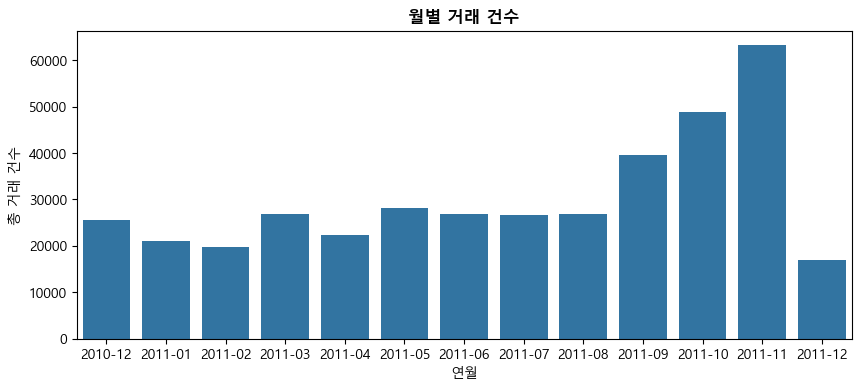

In [28]:
plt.rcParams.update({'font.size': 10})

plt.figure(figsize = (10,4))
sns.barplot(x="year_month", y="InvoiceNo", data=monthly)
plt.xlabel('연월')
plt.ylabel('총 거래 건수')
plt.title('월별 거래 건수', fontsize=12, fontweight='bold')
plt.show()

### ChatGPT Q&A

>**아래 그래프에서 막대 색깔을 너무 진하지 않은 grey로 통일하고, 가로축 레이블을 비스듬하게 해줘. 또한 그림의 선명도를 높여줘.**
>
>     plt.figure(figsize = (10,4))  
>     sns.barplot(x="year_month", y="InvoiceNo", data=monthly)  
>     plt.xlabel('연월')  
>     plt.ylabel('총 거래 건수')  
>     plt.title('월별 거래 건수', fontsize=12, fontweight='bold')

---

>말씀하신 요구 사항에 따라, 막대 색깔을 너무 진하지 않은 회색으로 변경하고, 가로축 레이블을 비스듬하게 설정하며, 그림의 선명도를 높이는 코드를 작성하겠습니다. 여기서는 matplotlib과 seaborn 라이브러리를 사용하고 있으므로 이를 기반으로 수정하겠습니다.
>
>     import matplotlib.pyplot as plt  
>     import seaborn as sns  
>     
>     plt.figure(figsize=(10, 4), dpi=120)  # dpi 값을 조정하여 선명도를 높입니다.  
>     sns.barplot(x="year_month", y="InvoiceNo", data=monthly, color='grey') 
>     plt.xlabel('연월')  
>     plt.ylabel('총 거래 건수')  
>     plt.title('월별 거래 건수', fontsize=12, fontweight='bold')  
>     plt.xticks(rotation=45)  # xticks의 rotation 파라미터로 레이블을 비스듬하게 설정합니다.  
>     plt.show()
>
>
>이 코드는 다음과 같은 변경을 포함하고 있습니다:
>- `plt.figure(figsize=(10, 4), dpi=120)`: `dpi` 파라미터를 사용하여 그림의 선명도를 높입니다. `dpi` 값이 클수록 그림이 더 선명해집니다.
>- `sns.barplot(..., color='grey')`: Seaborn의 `barplot`에서 `color` 파라미터를 사용하여 막대의 색상을 회색으로 지정합니다.
>- `plt.xticks(rotation=45)`: `plt.xticks` 함수에 `rotation` 파라미터를 사용하여 x축 레이블을 45도 기울여 표시합니다.
>
>위 코드는 `monthly`라는 DataFrame이 있고, 이 DataFrame에 'year_month'와 'InvoiceNo'라는 열이 있다고 가정합니다. 실제 데이터에 맞게 코드를 조정해 주세요.

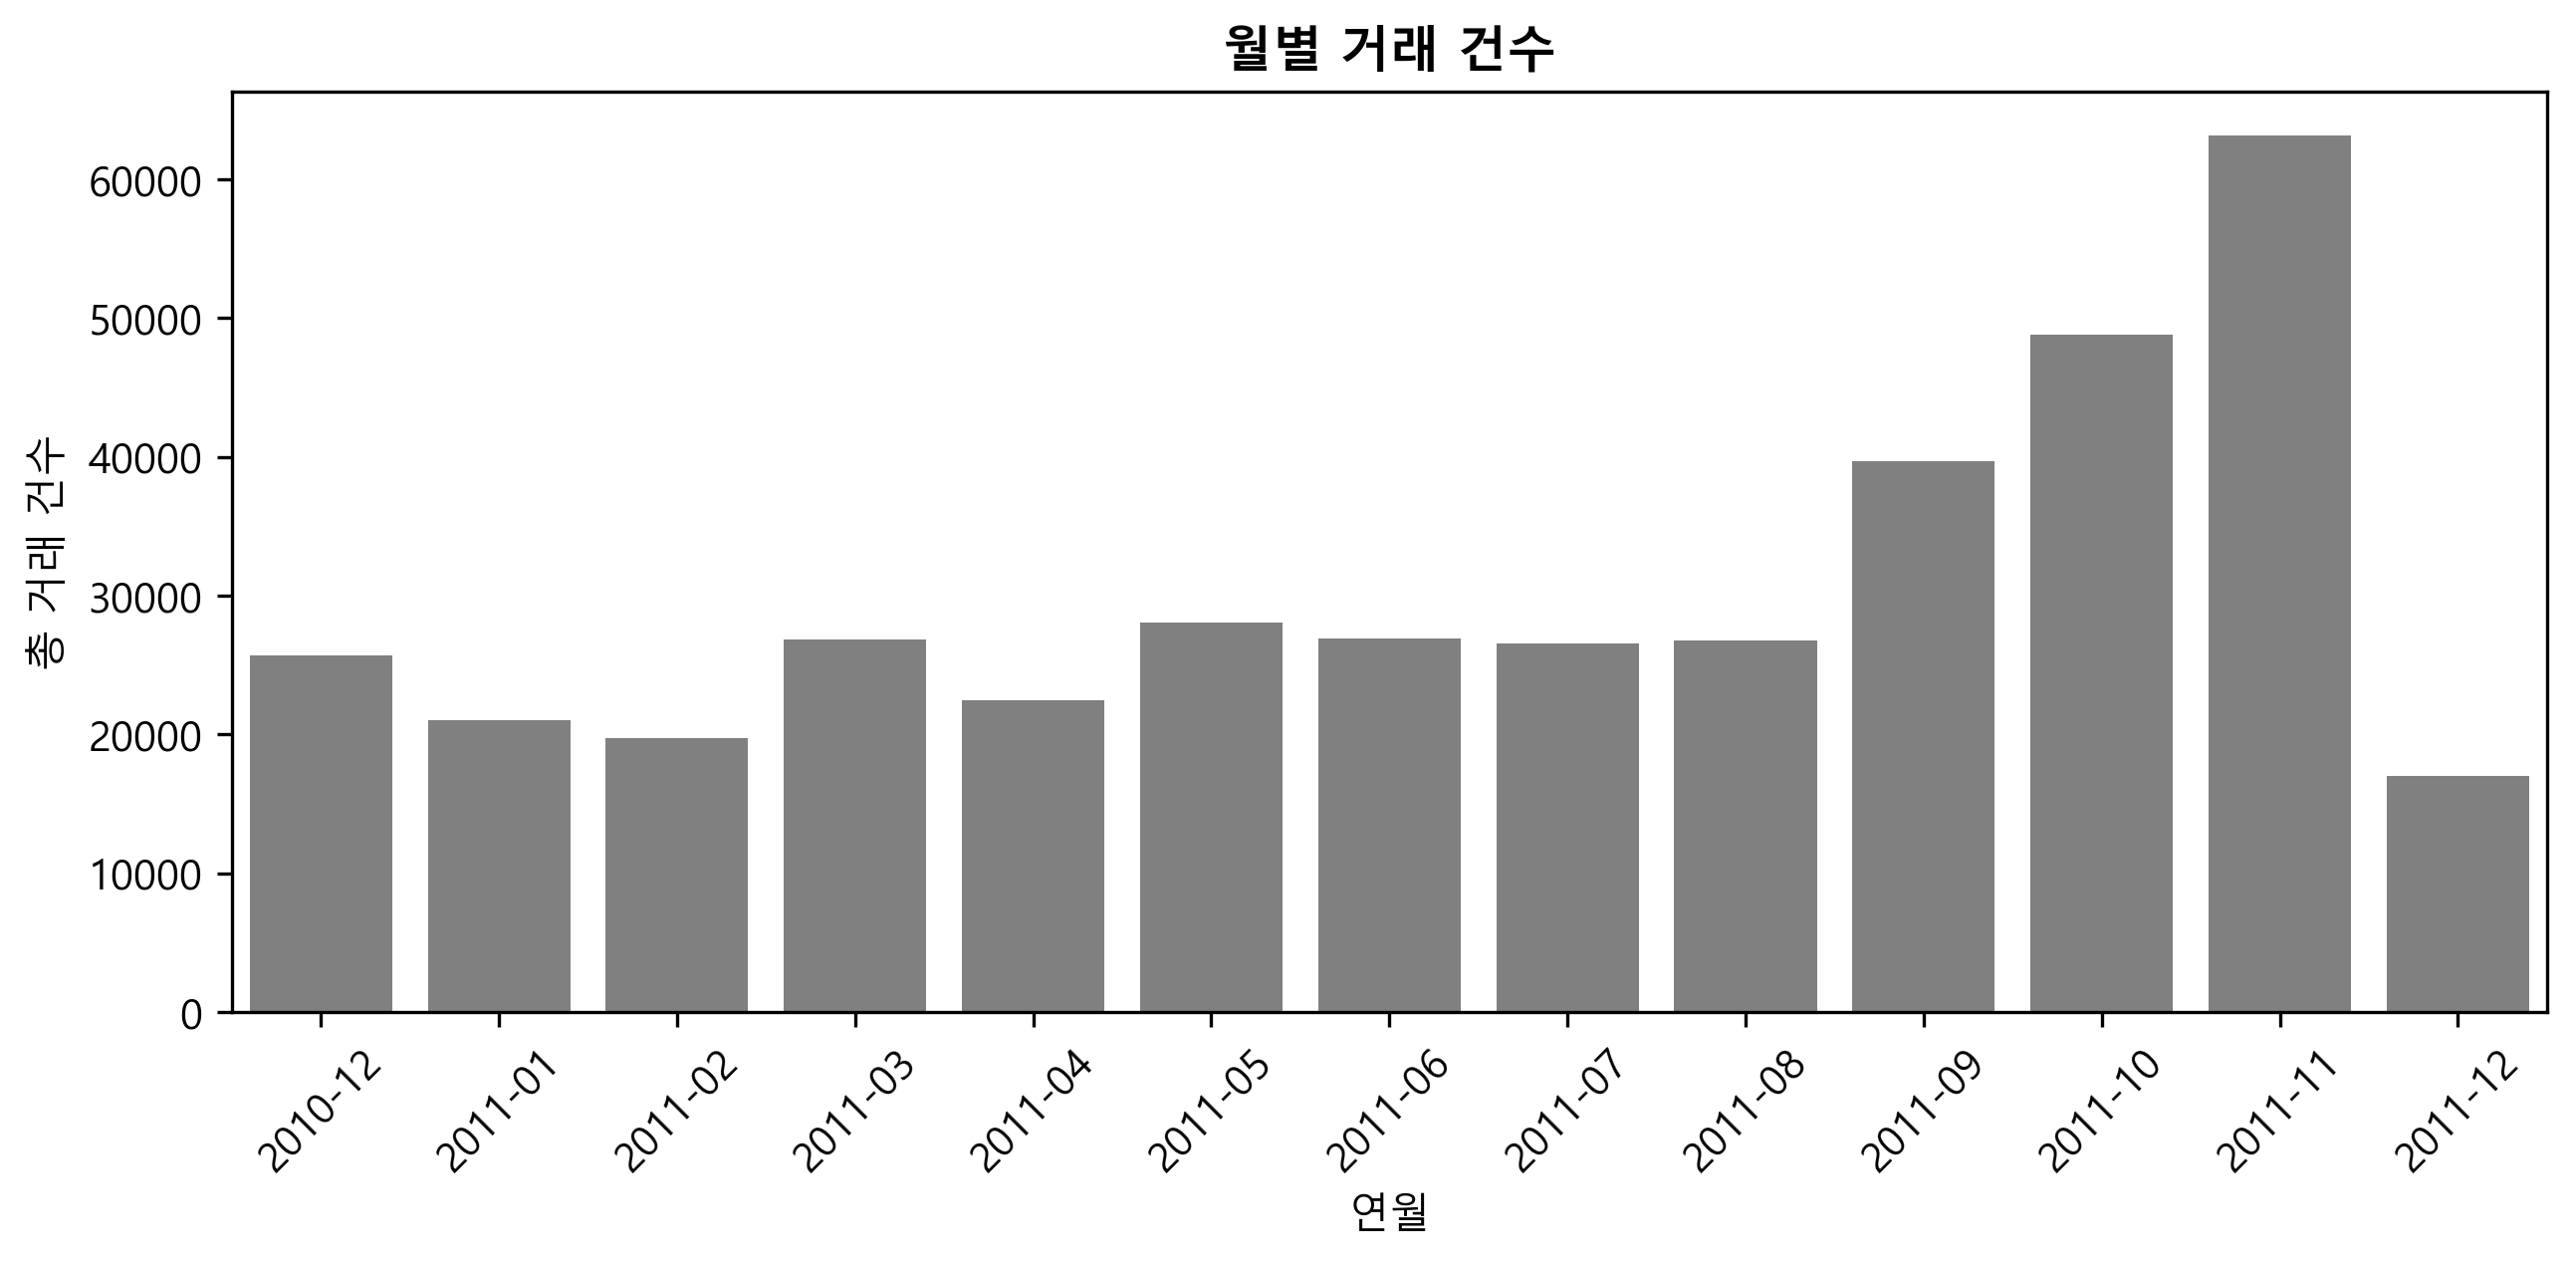

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4), dpi=300)  # dpi 값을 조정하여 선명도를 높입니다.
sns.barplot(x="year_month", y="InvoiceNo", data=monthly, color='grey')  
# color 파라미터로 막대 색상을 회색으로 설정합니다.
plt.xlabel('연월')
plt.ylabel('총 거래 건수')
plt.title('월별 거래 건수', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)  # xticks의 rotation 파라미터로 레이블을 비스듬하게 설정합니다.
plt.show()

### 요일별 거래 건수

이번에는 `groupby(['WeekDay'])`를 이용해 요일별 거래 건수를 구해보자. `reindex()` 메서드를 사용해서 요일을 Monday-Sunday 순으로 만들었다. 

결과를 보면, 흥미롭게도 토요일 거래가 전혀 없는 것을 알 수 있는데, 이는 아마도 데이터 수집 프로세스의 어떤 필터 때문일 수 있다. 토요일을 제외하면 요일별 거래 건수에 큰 차이는 없다.

In [30]:
Weekly = pd.DataFrame(df.groupby(['WeekDay'])['InvoiceNo'].count())
Weekly = Weekly.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                       'Friday', 'Saterday', 'Sunday']).reset_index()
Weekly

,WeekDay,InvoiceNo
0,Monday,64231.0
1,Tuesday,65744.0
2,Wednesday,68040.0
3,Thursday,79243.0
4,Friday,54222.0
5,Saterday,NaN
6,Sunday,61212.0


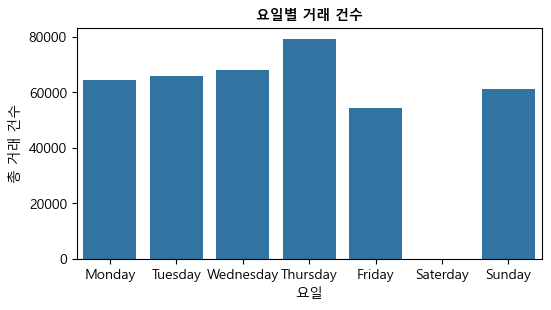

In [31]:
plt.figure(figsize = (6,3))
sns.barplot(x="WeekDay", y="InvoiceNo", data=Weekly)
plt.xlabel('요일')
plt.ylabel('총 거래 건수')
plt.title('요일별 거래 건수', fontsize=10, fontweight='bold')
plt.show()

### 시간별 거래 건수

이번에는 `groupby(['hour']`를 이용해 시간별 거래 건수를 구해보자. 오전 12시에서 오후 1시의 점심 시간에 이루어진 거래가 가장 많으며, 저녁 9시 이후부터 오전 6시까지는 거래가 전혀 없다.

In [32]:
hourly = pd.DataFrame(df.groupby(['hour'])['InvoiceNo'].count()).reset_index()
hourly

,hour,InvoiceNo
0,6,1
1,7,379
2,8,8687
3,9,21927
4,10,37773
5,11,48365
6,12,70938
7,13,63019
8,14,53251
9,15,44790


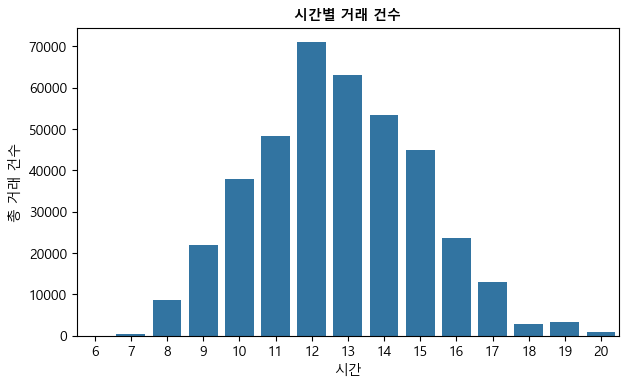

In [33]:
plt.figure(figsize = (7,4))
sns.barplot(x="hour", y="InvoiceNo", data=hourly)
plt.xlabel('시간')
plt.ylabel('총 거래 건수')
plt.title('시간별 거래 건수', fontsize=10, fontweight='bold')
plt.show()

### 판매액이 가장 많은 연월

앞에서 본 거래 건수뿐만 아니라 판매액이 가장 높은 달도 11월이다. 

In [34]:
monthly1 = pd.DataFrame(df.groupby(['year_month'])['Revenue'].sum()).reset_index()
monthly1

,year_month,Revenue
0,2010-12,570422.730
1,2011-01,568101.310
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,677355.150
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


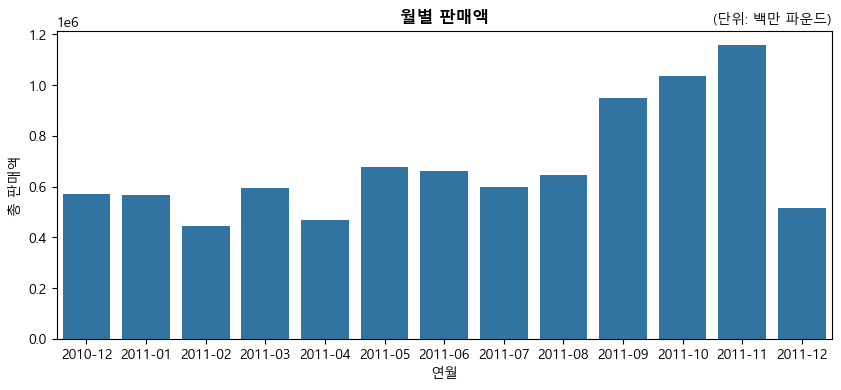

In [35]:
plt.figure(figsize = (10,4))
sns.barplot(x = 'year_month', y='Revenue', data=monthly1)
plt.xlabel('연월')
plt.ylabel('총 판매액')
plt.title('월별 판매액', fontsize=12, fontweight='bold')
plt.title('(단위: 백만 파운드)', fontsize=10, loc='right')
plt.show()

**참고: `1e6` 의미?(지수 표기법)**

위 그림 좌축 맨 위에 나와 있는 `1e6`은 지수 표기법으로서 다음을 의미한다.
* 예 1: `2.3e6`(또는 `2.3e+6`)은 $2.3\times10^6$, 즉 $2.3\times1,000,000$, 다시 말하면 $2,300,000$을 의미한다.
* 예 2: `2.3e-2`은 $2.3\times10^{-2}$, 즉 $2.3\times0.01$, 다시 말하면 $0.023$을 의미한다.

### 제품 가격 분석

`UnitPrice`(단가) 변수에 대한 기술 통계를 보면 대부분의 판매상품이 상당히 저렴하다는 것을 알 수 있다. 작은 사무용품이나 작은 장식품 등을 판매하는 것으로 보인다.

In [36]:
pd.DataFrame(df['UnitPrice'].describe())

,UnitPrice
count,392692.000000
mean,3.125914
std,22.241836
min,0.001000
25%,1.250000
50%,1.950000
75%,3.750000
max,8142.750000


**단가가 50파운드 이상인 제품**

In [37]:
df[df['UnitPrice'] > 50]['Description'].unique().tolist()
#  소박한 17 서랍 찬장
#  빈티지 우체국 캐비닛
#  빈티지 레드 주방 캐비닛
#  셔터가 있는 리젠시 미러
#  러브 시트 앤티크 화이트 메탈
#  빈티지 블루 주방 캐비닛
#  학교 책상과 의자
#  체스트 천연목 20단 서랍
#  운반대
#  장식용 걸이형 선반 유닛
#  매뉴얼
#  우표
#  소풍 바구니 고리버들 60개
#  닷컴 우표

['rustic  seventeen drawer sideboard',
 'vintage post office cabinet',
 'vintage red kitchen cabinet',
 'regency mirror with shutters',
 'love seat antique white metal',
 'vintage blue kitchen cabinet',
 'school desk and chair ',
 'chest natural wood 20 drawers',
 'carriage',
 'decorative hanging shelving unit',
 'manual',
 'postage',
 'picnic basket wicker 60 pieces',
 'dotcom postage']

**고가 상품의 가격 분포**

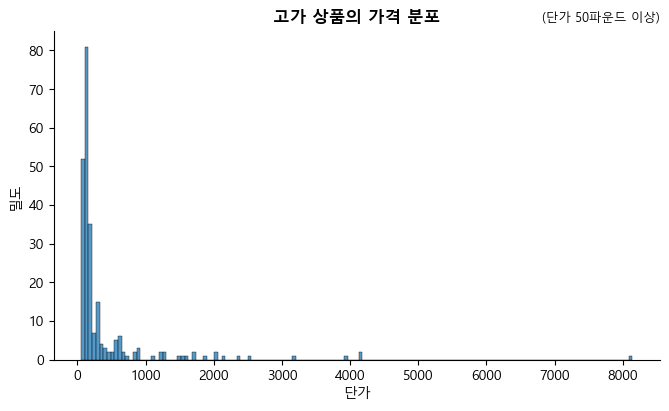

In [38]:
sns.displot(df[df['UnitPrice'] > 50]['UnitPrice'], height=4, aspect=1.7)
plt.xlabel('단가')
plt.ylabel('밀도')
plt.title('고가 상품의 가격 분포', fontsize=12, fontweight='bold')
plt.title('(단가 50파운드 이상)', fontsize=9, loc='right')
plt.show()

### 거래 빈도가 가장 높은 제품

In [39]:
prod = pd.DataFrame(df['Description'].value_counts().head(10))
prod = prod.set_axis(['freq'], axis=1).rename_axis('Description').reset_index()
prod

,Description,freq
0,white hanging heart tlight holder,2016
1,regency cakestand 3 tier,1713
2,jumbo bag red retrospot,1615
3,assorted colour bird ornament,1395
4,party bunting,1389
5,lunch bag red retrospot,1303
6,set of 3 cake tins pantry design,1152
7,postage,1099
8,lunch bag black skull,1078
9,pack of 72 retrospot cake cases,1050


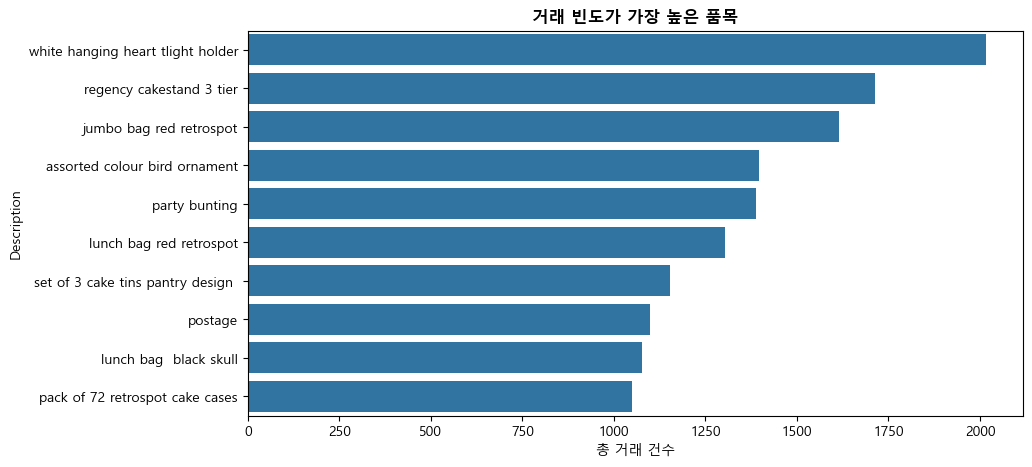

In [40]:
plt.figure(figsize = (10,5))
sns.barplot(x='freq', y='Description', data=prod.sort_values(by='freq',ascending=False))
plt.title('거래 빈도가 가장 높은 품목', fontsize=12, fontweight='bold')
plt.xlabel('총 거래 건수')
plt.show()

### 나라별 거래

**나라별 고유 고객 숫자(비중)**

In [41]:
customer_country = df[['Country', 'CustomerID']].drop_duplicates()
customer_country['Country'].value_counts(normalize = True).head(10)

Country
United Kingdom    0.901979
Germany           0.021629
France            0.020018
Spain             0.006903
Belgium           0.005752
Switzerland       0.004832
Portugal          0.004372
Italy             0.003221
Finland           0.002761
Austria           0.002531
Name: proportion, dtype: float64

In [42]:
print("거래는", len(df['Country'].unique()), "개 나라와 행해졌다.")

거래는 37 개 나라와 행해졌다.


In [43]:
print("나라 이름이 \"Unspecified\"로 표기된 거래 건수:", 
      len(df[df['Country']=='Unspecified']))

나라 이름이 "Unspecified"로 표기된 거래 건수: 241


**나라별 판매액**

In [44]:
country = pd.DataFrame(df.groupby(['Country'])['Revenue'].sum()).reset_index()
country = country.sort_values(['Revenue'], 
                              ascending=False).reset_index(drop=True).head(10)
country

,Country,Revenue
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


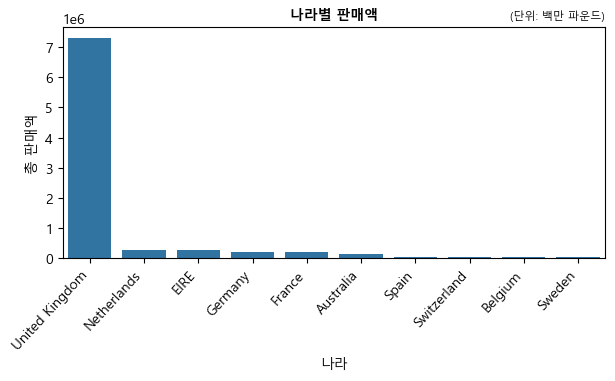

In [45]:
plt.figure(figsize = (7,3))
ax = sns.barplot(x='Country', y='Revenue', data=country)
plt.xticks(rotation=47, ha="right") # 나라이름 기울게 표시
plt.xlabel('나라')
plt.ylabel('총 판매액')
plt.title('나라별 판매액', fontsize=10, fontweight='bold')
plt.title('(단위: 백만 파운드)', fontsize=8, loc='right')
plt.show()

**나라별 거래 건수**

In [46]:
country1 = pd.DataFrame(df.groupby(['Country'])['InvoiceNo'].count()).reset_index()
country1 = country1.rename(columns={'InvoiceNo': 'Frequency'})
country1 = country1.sort_values(['Frequency'], 
                                ascending=False).reset_index(drop=True).head(10)
country1

,Country,Frequency
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1453
9,Australia,1181


위 데이터프레임의 "Frequency" 열은 (각 판매가 발생한) 거래 건수를 나라별로 카운트한 것이다.

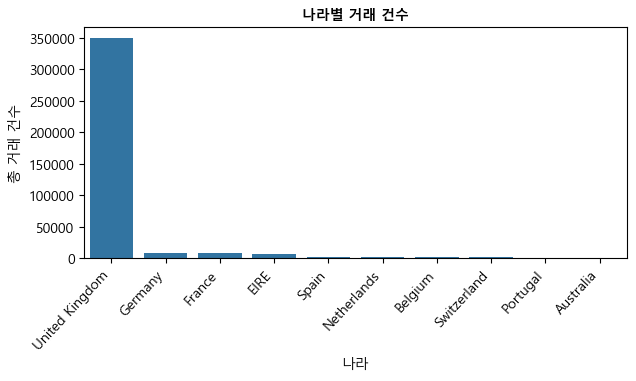

In [47]:
plt.figure(figsize = (7,3))
ax = sns.barplot(x='Country', y='Frequency', data=country1)
plt.xticks(rotation=47, ha="right")
plt.xlabel('나라')
plt.ylabel('총 거래 건수')
plt.title('나라별 거래 건수', fontsize=10, fontweight='bold')
plt.show()

### 상위 10대 고객 파악하기

판매액 기준 상위 10대 고객을 파악하기 위해 먼저 `transform('count')`을 사용하여 `CustomerID` 별로(즉, 개별 고객별로) 원소의 개수를 구하여 데이터프레임에 새로운 변수로 추가한다.

In [48]:
df['freq'] = df.groupby('CustomerID')['CustomerID'].transform('count')

`CustomerID` 별로 판매액의 합이 가장 많은 10대 고객을 추려내 `customer`라는 데이터프레임을 만든다.

In [49]:
customer  = pd.DataFrame(df.groupby(['CustomerID'])['Revenue'].sum()
                         .sort_values(ascending=False)).reset_index().head(10)

`isin` 메서드를 사용해 원래 `df`의 고객 중 `customer` 데이터프레임에 들어있는 고객(즉 상위 10대 고객)만을 추려내 `top_customer`라는 데이터프레임을 만든다.

In [50]:
top_customer = df[df['CustomerID'].isin(customer['CustomerID'])]\
    [['CustomerID', 'Country', 'Revenue', 'Quantity', 'freq']]
top_customer

,CustomerID,Country,Revenue,Quantity,freq
173,16029.0,United Kingdom,178.20,36,241
174,16029.0,United Kingdom,165.00,100,241
175,16029.0,United Kingdom,165.00,100,241
176,16029.0,United Kingdom,733.44,192,241
177,16029.0,United Kingdom,647.04,192,241
...,...,...,...,...,...
528288,18102.0,United Kingdom,449.82,126,431
528289,18102.0,United Kingdom,491.40,126,431
528290,18102.0,United Kingdom,522.90,126,431
528623,16446.0,United Kingdom,168469.60,80995,3


`unique()` 메서드로 상위 10대 고객이 속해 있는 나라들을 (중복 없이) 파악한다. 그 결과, 상위 10대 고객이 속해 있는 나라들은 영국, 아일랜드, 네덜란드, 호주 등 4개국이다.

In [51]:
top_customer['Country'].unique()

array(['United Kingdom', 'EIRE', 'Netherlands', 'Australia'], dtype=object)

## 4.4 RFM 분석

RFM은 가치있는 고객을 추출해내어 이를 기준으로 고객을 분류할 수 있는 매우 간단하면서도 유용한 방법이다(Wikipedia, "[RFM (market research)][key]"). RFM은 Recency, Frequency, Monetary의 약자로 이들 세 가지 기준에 의해 고객의 가치를 계산한다.

[key]: https://en.wikipedia.org/wiki/RFM_(market_research)

- Recency - 거래의 최근성: 고객이 얼마나 최근에 구입했는가?
- Frequency - 거래 빈도: 고객이 얼마나 빈번하게 우리 상품을 구입했는가?
- Monetary - 거래 규모: 고객이 구입했던 총 금액은 얼마인가?

아래는 영국 고객만을 대상으로 한 RFM 분석이다. 우선 영국 고객들만 뽑아내보자.

In [52]:
df_uk = df[df['Country'] == "United Kingdom"]
df_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,year_month,hour,Revenue,freq
0,536365,85123A,white hanging heart tlight holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,15.30,297
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34,297
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,22.00,297
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34,297
4,536365,84029E,red woolly hottie white heart,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12,8,20.34,297


`InvoiceDate` 변수를 사용해서 최초 거래가 발생한 시점과 마지막 거래가 발생한 시점을 파악한다.

In [53]:
print(df_uk['InvoiceDate'].min())
print(df_uk['InvoiceDate'].max())

2010-12-01 08:26:00
2011-12-09 12:49:00


`datetime` 모듈의 `datetime` 함수를 사용해서 마지막 거래가 발생한 그 다음날(2011년 12.10일)을 현재(`presence`)로 지정한다. 이는 아래에서 거래의 최근성(즉, RFM 중 "R")을 파악하기 위한 사전 작업이다. 

In [54]:
import datetime as dt
presence = dt.datetime(2011,12,10)

### RFM 계산

아래는 각 고객(`CustomerID`) 별로 RFM을 계산한 것이다. 우선 "Recency"는 앞에서 정해놓은 현재 시점(`presence`)과 해당 고객의 마지막 거래 시점 간의 간격을 날짜수로 파악한 것이고, "Frequency"는 해당 고객에게 인보이스 번호가 몇 차례 발행됐는지를 측정한 것이며, "Monetary"는 해당 고객의 건별 구매액을 모두 합친 것이다. 

이들을 계산하는 데 사용된 `agg()` 메서드는 `apply()` 메서드와 동일한 기능을 하나, 다중집계 작업을 할 수 있는 점이 다르다. 또한 `lambda`를 이용한 함수 만들기가 유용하게 사용된 것을 알 수 있다. 영국 고객 3,920명의 RFM 계산 결과를 아래에서 확인할 수 있다.

In [55]:
rfm = df_uk.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (presence - x.max()).days, 
     'InvoiceNo': lambda x: len(x), 
     'Revenue': lambda x: x.sum()}
)
rfm['InvoiceDate']

CustomerID
12346.0    325
12747.0      2
12748.0      0
12749.0      3
12820.0      3
          ... 
18280.0    277
18281.0    180
18282.0      7
18283.0      3
18287.0     42
Name: InvoiceDate, Length: 3920, dtype: int64

In [56]:
rfm = df_uk.groupby('CustomerID').agg(
    {'InvoiceDate': lambda x: (presence - x.max()).days, 
     'InvoiceNo': lambda x: len(x), 
     'Revenue': lambda x: x.sum()}
)
rfm.rename(columns = {'InvoiceDate': 'Recency',
                      'InvoiceNo': 'Frequency',
                      'Revenue': 'Monetary'}, inplace=True)
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4412,33053.19
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


**RFM 사분위수**

아래 결과를 보면, 

- Recency의 경우, 현재(2011년 12.10일)로부터 17일전 거래가 상위 25%의 최근성에 해당한다. 
- Frequency의 경우, 총 98번 구매가 상위 25%의 거래 빈도에 속한다. 
- Monetary의 경우, 구매액 1,521파운드가 상위 25%의 거래 금액에 속한다. 

아래 표에서 `Recency` 변수는 값이 낮을수록 우량 고객임을 의미하고, `Frequency` 및 `Monetary` 변수는 값이 높을수록 우량 고객임을 의미한다.

In [57]:
quartiles = rfm.quantile(q=[0.25,0.5,0.75])
quartiles

,Recency,Frequency,Monetary
0.25,17.0,17.0,298.185
0.50,50.0,40.0,644.975
0.75,142.0,98.0,1571.285


**RFM 등급**

앞에서 구한 RFM "값"을 4개의 "등급"으로 변환해보기로 한다. 즉 `Recency`, `Frequency`, `Monetary` 3개 변수 각각에 대해 최상위 25%를 1등급, 그 다음 25%를 2등급, 그 다음 25%를 3등급, 마지막 최하위 25%를 4등급으로 분류하는 것이다. 4개 등급으로 나누기 때문에 앞에서 구한 사분위수(`quartiles`)를 각 등급의 경계값으로 삼으면 된다. 

In [58]:
# 데이터프레임 형태인 quartiles를 딕셔너리 형태로 바꿈 
quartiles = quartiles.to_dict()
quartiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.18500000000006,
  0.5: 644.9749999999999,
  0.75: 1571.285}}

RFM 값을 사분위수와 비교하여 등급을 부여하는 작업을 함수를 만들어 수행한다. `Recency` 변수는 RFM값이 낮을수록 우량 고객이고(즉, 등급 숫자가 낮고), `Frequency` 및 `Monetary` 변수는 RFM 값이 높을수록 우량 고객이기 때문에 이를 반영하여 아래와 같이 `Class1` 및 `Class2`라는 두 개의 함수를 만든다. 

In [59]:
# Arguments (x = value, p = Recency, Frequency, Monetary, d = quartiles dict)
def Class1(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def Class2(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

RFM 값을 사분위수와 비교하여 등급을 부여한 다음, `RClass`, `FClass`, `MClass`라는 이름으로 저장한다.

In [60]:
rfm['RClass'] = rfm['Recency'].apply(Class1, args=('Recency', quartiles))
rfm['FClass'] = rfm['Frequency'].apply(Class2, args=('Frequency', quartiles))
rfm['MClass'] = rfm['Monetary'].apply(Class2, args=('Monetary', quartiles))

`RClass`, `FClass`, `MClass` 등급을 순서대로 붙여서 `RFMClass`라는 이름으로 저장한다.

In [61]:
rfm['RFMClass'] = rfm.RClass.map(str) + rfm.FClass.map(str) + rfm.MClass.map(str)
rfm.head()

,Recency,Frequency,Monetary,RClass,FClass,MClass,RFMClass
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4412,33053.19,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


아래 결과에서 보듯이 RFM 등급을 기준으로 했을 때, 3,920명의 영국 고객을 총 61개의 범주로 분류할 수 있다. 

In [62]:
rfm['RFMClass'].unique()

array(['441', '111', '122', '444', '322', '341', '333', '133', '231',
       '233', '433', '311', '212', '411', '332', '223', '222', '324',
       '443', '321', '312', '422', '343', '344', '211', '423', '112',
       '243', '142', '234', '121', '442', '221', '131', '134', '334',
       '213', '244', '421', '143', '434', '144', '431', '113', '432',
       '132', '331', '242', '342', '424', '323', '123', '232', '224',
       '124', '412', '241', '313', '413', '114', '141'], dtype=object)

### 고객 세분화

* RFM에서 R(거래 최근성), F(거래 빈도), M(거래 금액) 모두 1등급인 고객을 "Champions"라 했을 때, 407명(10.38%)이 여기에 속한다.

In [63]:
c = len(rfm[rfm['RFMClass']=='111'])
print("Champions: ", c, "(", round(c/len(rfm)*100, 2), "%)") 

Champions:  407 ( 10.38 %)


* RFM에서 F(거래 빈도)가 1등급인 고객을 "Loyal Customers"라 했을 때, 969명(24.72%)이 여기에 속한다.

In [64]:
c = len(rfm[rfm['FClass']==1])
print("Loyal Customers: ", c, "(", round(c/len(rfm)*100, 2), "%)") 

Loyal Customers:  969 ( 24.72 %)


* RFM에서 M(거래 금액)이 1등급인 고객을 "Big Spenders"라 했을 때, 980명(25.0%)이 여기에 속한다.

In [65]:
c = len(rfm[rfm['MClass']==1])
print("Big Spenders: ", c, "(", round(c/len(rfm)*100, 2), "%)") 

Big Spenders:  980 ( 25.0 %)


* RFM에서 R(거래 최근성)은 3등급인 반면, F(거래 빈도)와 M(거래 금액)은 2등급인 고객을 "About to Sleep"이라 했을 때, 147명(3.75%)이 여기에 속한다.

In [66]:
c = len(rfm[rfm['RFMClass']=='322'])
print("About to Sleep: ", c, "(", round(c/len(rfm)*100, 2), "%)") 

About to Sleep:  147 ( 3.75 %)


* RFM에서 R(거래 최근성), F(거래 빈도), M(거래 금액) 모두 4등급인 고객을 "Lost Customers"라 했을 때, 343명(8.75%)이 여기에 속한다.

In [67]:
c = len(rfm[rfm['RFMClass']=='444'])
print("Lost Customers: ", c, "(", round(c/len(rfm)*100, 2), "%)") 

Lost Customers:  343 ( 8.75 %)
